In [3]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [44]:
# import csv file
df=pd.read_csv(r"C:\Users\Aamir choudhary\Downloads\tip.csv")

In [45]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [46]:
df.shape

(244, 7)

In [47]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [49]:
#check for null values
pd.isnull(df).sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [13]:
# Drop null values

df.dropna(inplace=True)

In [23]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [50]:
#Rename column
df=df.rename(columns= {'sex':'gender'})

In [51]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [37]:
# use describe() for specific columns
df[['tip', 'total_bill']].describe()

,tip,total_bill
count,244.000000,244.000000
mean,2.998279,19.785943
std,1.383638,8.902412
min,1.000000,3.070000
25%,2.000000,13.347500
50%,2.900000,17.795000
75%,3.562500,24.127500
max,10.000000,50.810000


# Exploratory Data Analysis

### Gender

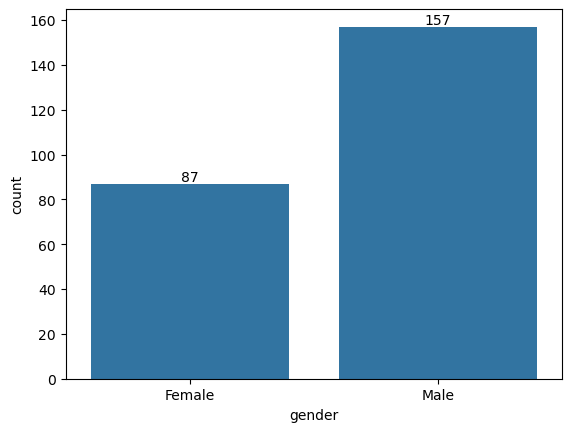

In [53]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
The dataset shows a higher number of male participants compared to female participants, indicating a gender imbalance in the data.

<Axes: xlabel='gender', ylabel='tip'>

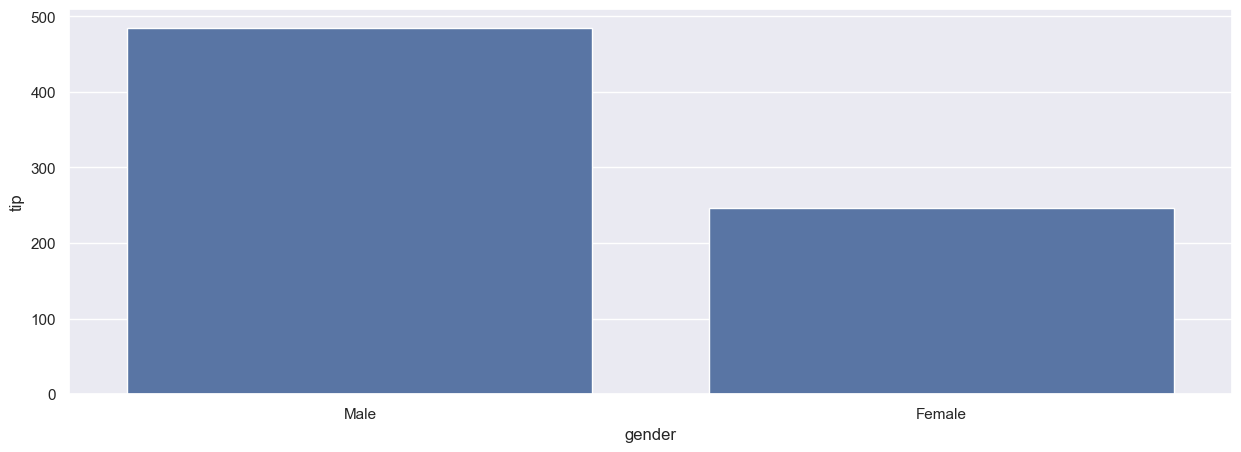

In [68]:
# plotting a bar chart for gender vs total amount

tips_gen = df.groupby(['gender'], as_index=False)['tip'].sum().sort_values(by='tip', ascending=False)

sns.barplot(x = 'gender',y= 'tip' ,data = tips_gen)

The bar chart shows that male customers contribute a higher total tip amount compared to female customers, largely due to higher male representation in the dataset.

In [59]:
df.columns

Index(['total_bill', 'tip', 'gender', 'smoker', 'day', 'time', 'size'], dtype='object')

# size and gender

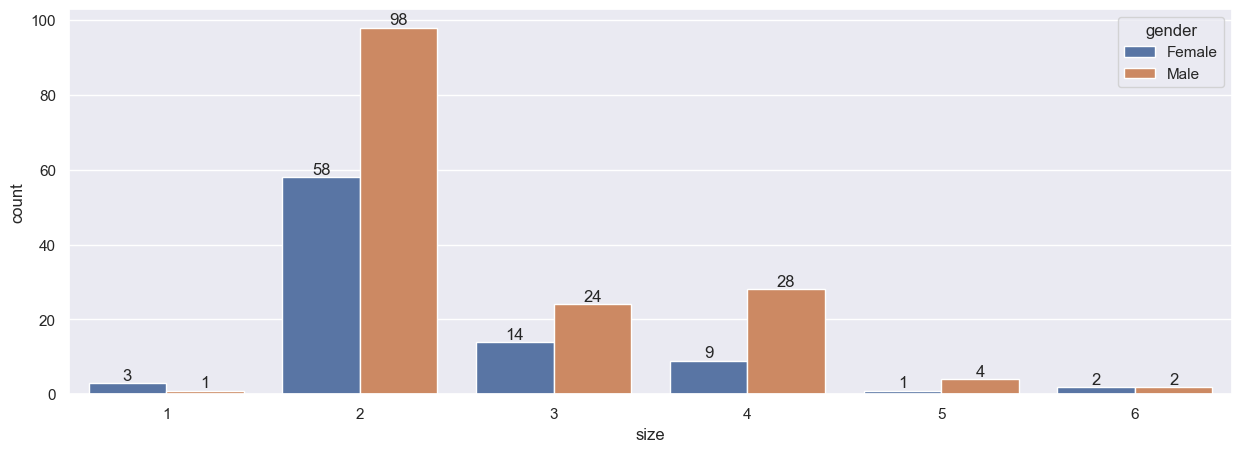

In [70]:
ax = sns.countplot(data = df, x = 'size', hue = 'gender')

for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
*The analysis shows that most customers dine in small groups,
particularly of size two. Across all group sizes,
male customers are more frequent than female customers,
indicating a gender imbalance in the dataset.*

<Axes: xlabel='tip', ylabel='total_bill'>

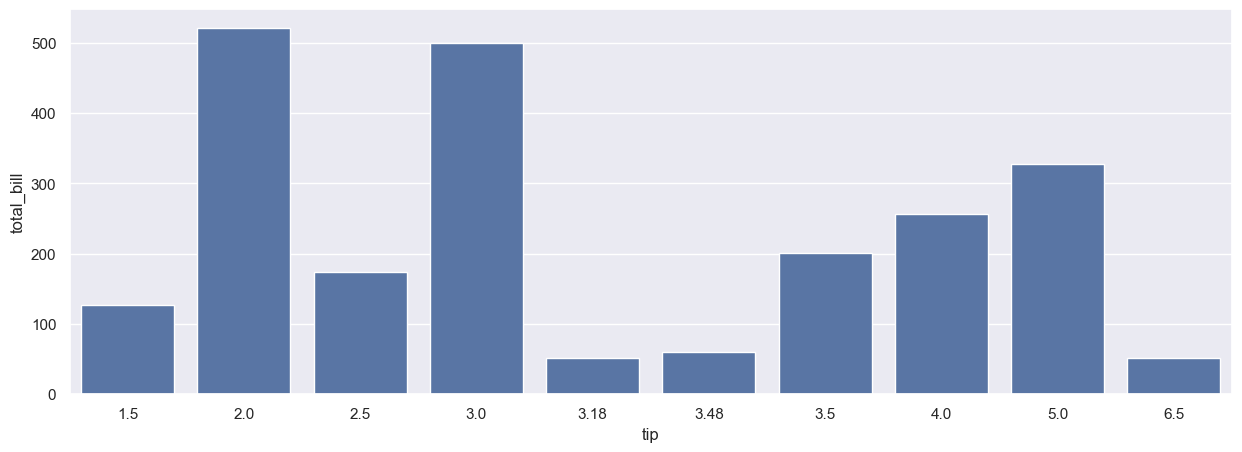

In [72]:

tip_total_bill = df.groupby(['tip'], as_index=False)['total_bill'].sum().sort_values(by='total_bill', ascending=False).head(10)

sns.barplot(x = 'tip',y= 'total_bill' ,data = tip_total_bill)

In [ ]:
#Observations:
The analysis shows a positive relationship between total bill and tip amount.
As the total bill increases, customers tend to give higher tips.

<Axes: xlabel='smoker', ylabel='tip'>

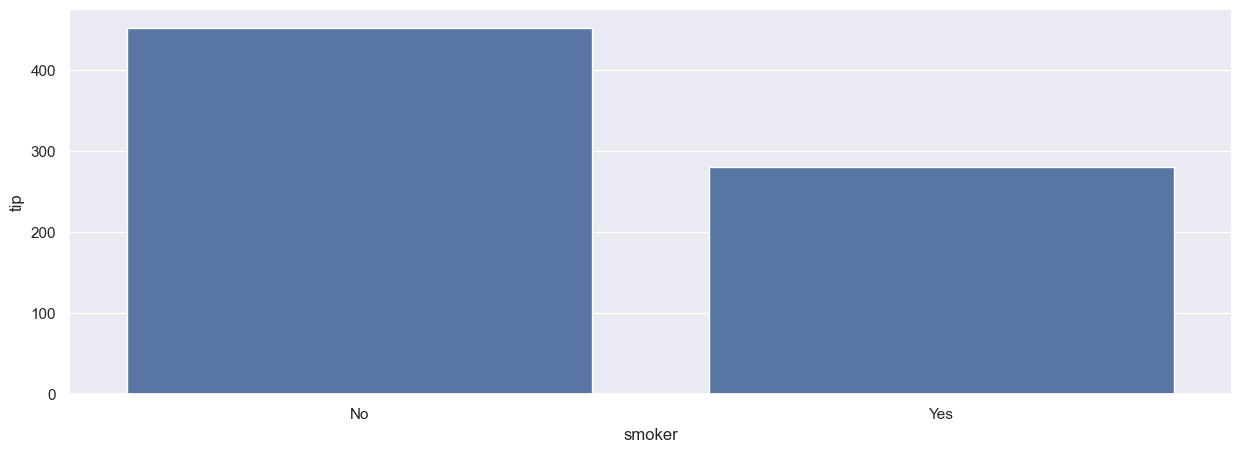

In [73]:
# Analysis of  tips given Smoker customers
sales_state = df.groupby(['smoker'], as_index=False)['tip'].sum().sort_values(by='tip', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'smoker',y= 'tip')

In [ ]:
#Observations:
The analysis shows that non-smokers contribute a higher total tip amount than smokers,
mainly due to their higher presence in the dataset.

<Axes: xlabel='smoker', ylabel='total_bill'>

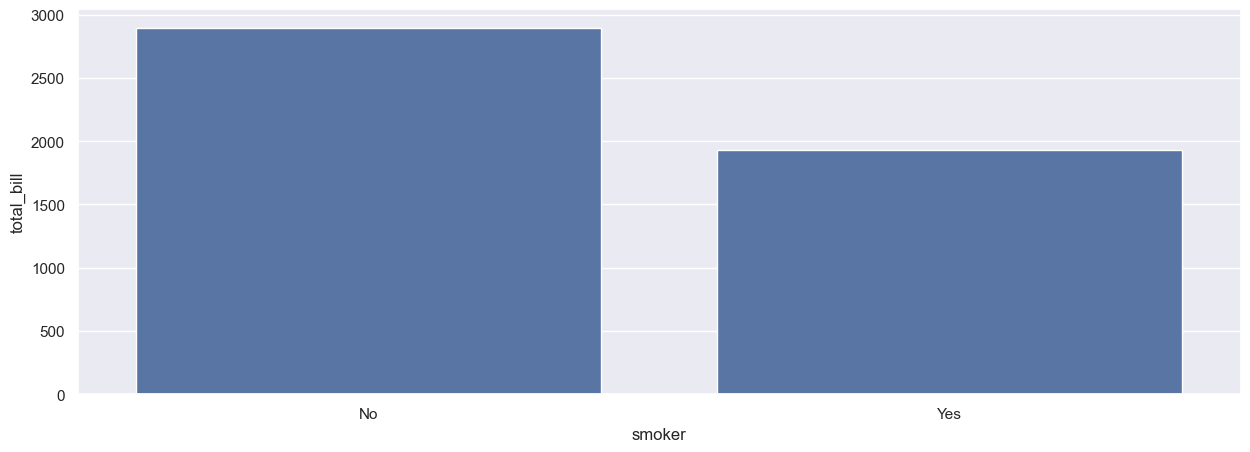

In [74]:

sales_state = df.groupby(['smoker'], as_index=False)['total_bill'].sum().sort_values(by='total_bill', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'smoker',y= 'total_bill')

In [ ]:
The analysis shows that non-smokers contribute a higher total bill amount than smokers,
mainly due to their higher frequency in the dataset.

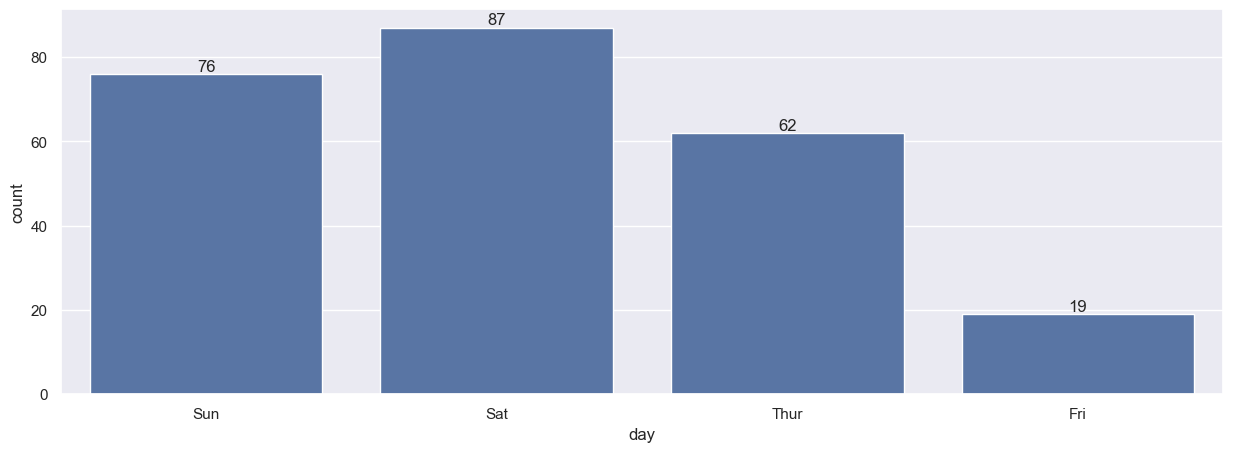

In [75]:
ax = sns.countplot(data = df, x = 'day')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
*The analysis indicates that customer activity is highest on weekends, 
particularly on Saturday, while Friday has the lowest number of orders.*

<Axes: xlabel='day', ylabel='tip'>

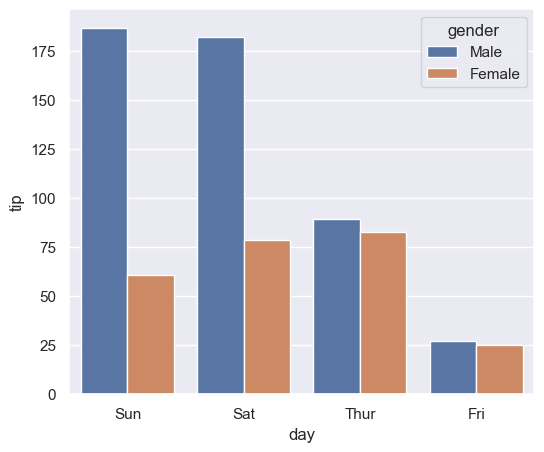

In [76]:
sales_state = df.groupby(['day', 'gender'], as_index=False)['tip'].sum().sort_values(by='tip', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'day',y= 'tip', hue='gender')

In [ ]:
The analysis shows that tips are highest on weekends,
especially on Saturday. Across all days, male customers contribute more tips than female customers,
while Friday records the lowest tip amounts.

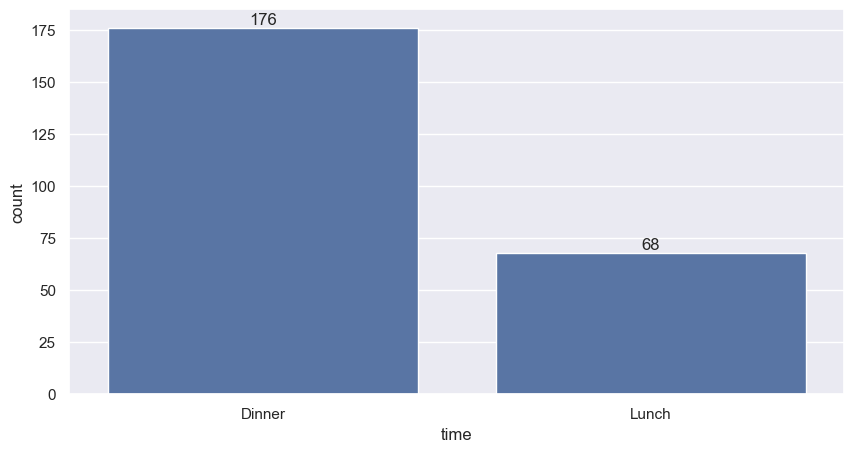

In [79]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.countplot(data = df, x = 'time')

for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
The analysis shows that customer count is significantly higher during dinner compared to lunch, 
indicating that dinner is the peak business time.

<Axes: xlabel='day', ylabel='total_bill'>

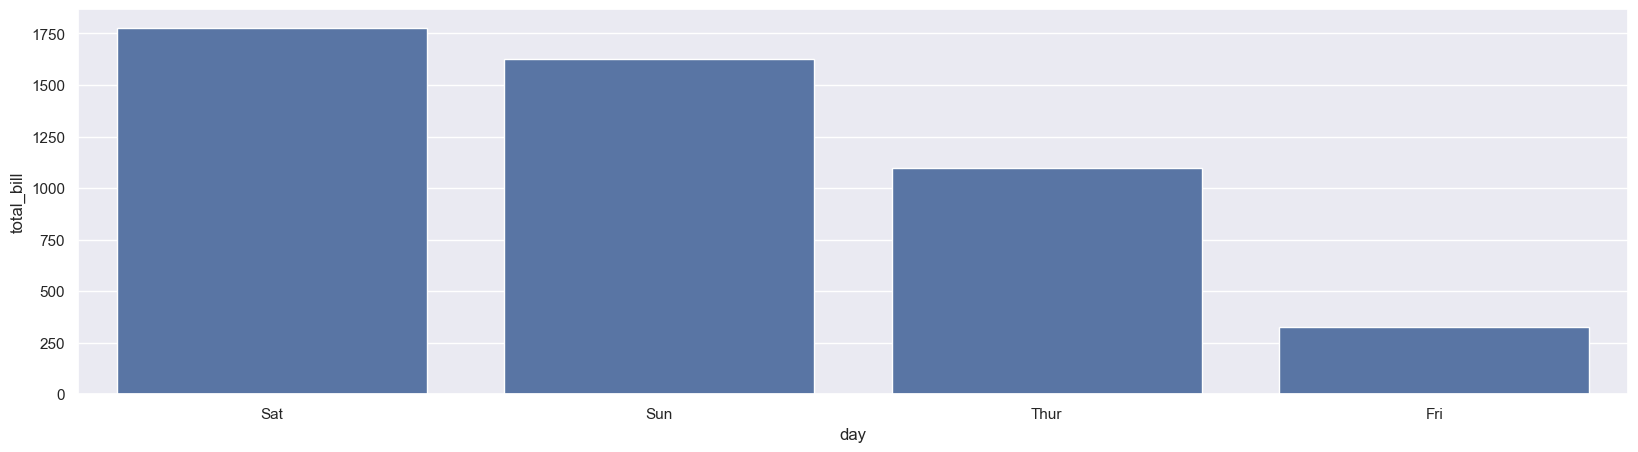

In [78]:
sales_state = df.groupby(['day'], as_index=False)['total_bill'].sum().sort_values(by='total_bill', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'day',y= 'total_bill')

In [ ]:
The analysis indicates that total revenue is highest on weekends, 
particularly on Saturday, while Friday generates the lowest total bill amount.

## Conclusion:

### 

In [ ]:
The analysis shows that weekends and dinner time generate the highest sales and tips,
with male and non-smoker customers contributing more to overall revenue.

# 📊 Business Recommendations (Based on Graph Analysis)

In [ ]:
Recommendation:

Weekend par extra staff, fast service, aur high-margin items promote karein.

Weekend-only premium combos introduce kiye ja sakte hain.

# Dinner Time Focus

In [ ]:
Dinner Time Focus

Dinner time me Lunch ke comparison me kaafi zyada orders aur revenue generate hota hai.

👉 Recommendation:

Dinner hours me staff strength aur inventory increase karni chahiye.

Candle dinner / family dinner offers jaise campaigns effective rahenge.

# Improve Low-Performing Days (Friday & Lunch Time)

In [ ]:

Graphs ke according Friday aur lunch time lowest performing hain.

👉 Recommendation:

Friday & lunch ke liye discounts, happy hours, office lunch combos launch karein.

Corporate tie-ups ya weekday special menus revenue badha sakte hain.

# Male Customers Are Major Contributors

In [ ]:

Male customers ka total bill aur tip contribution zyada hai.

👉 Recommendation:

Sports screening nights, men-preferred menu items aur loyalty offers launch kiye ja sakte hain.

Evening promotions male customer traffic ko aur boost kar sakti hain.

Thank you!